In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
138,072 cases (7 day average) as of Sat 01 Jan, +5,085.0 since Fri 31 Dec
2,041 hospitalised (7 day average) as of Tue 04 Jan, +2.7 since Mon 03 Jan
110 died (7 day average) as of Sat 01 Jan, +8.7 since Fri 31 Dec


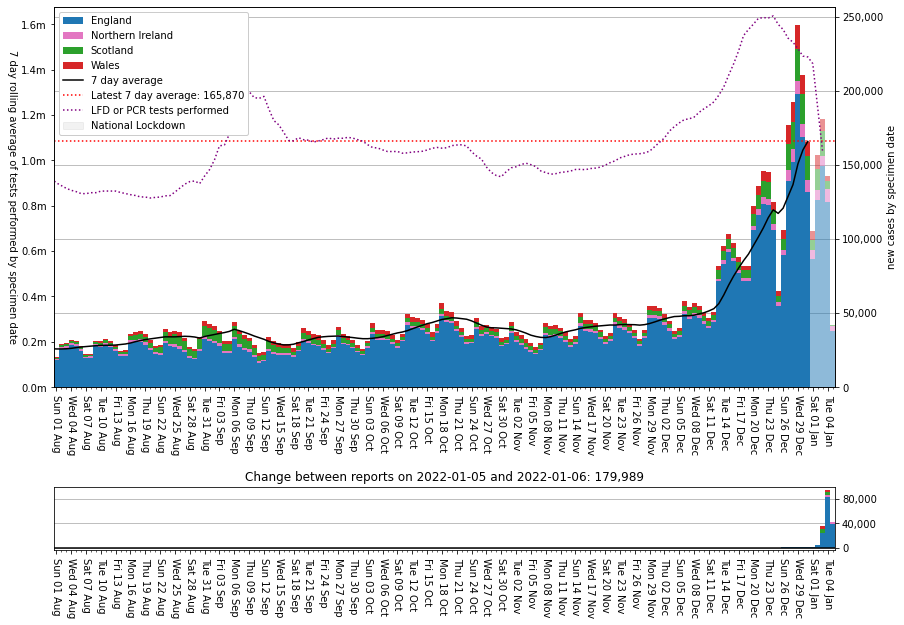

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

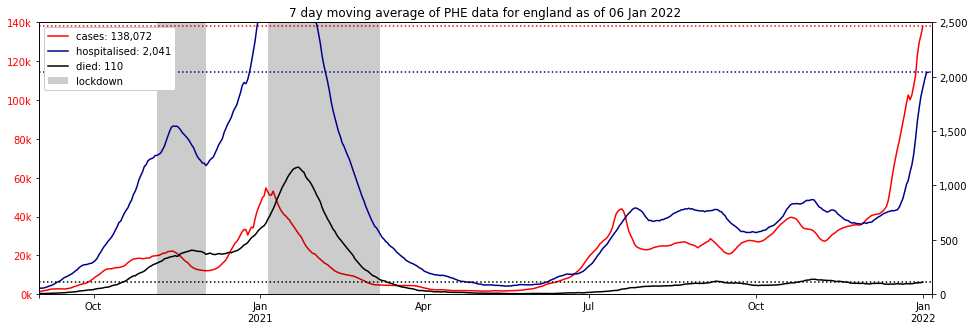

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=140_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2500)

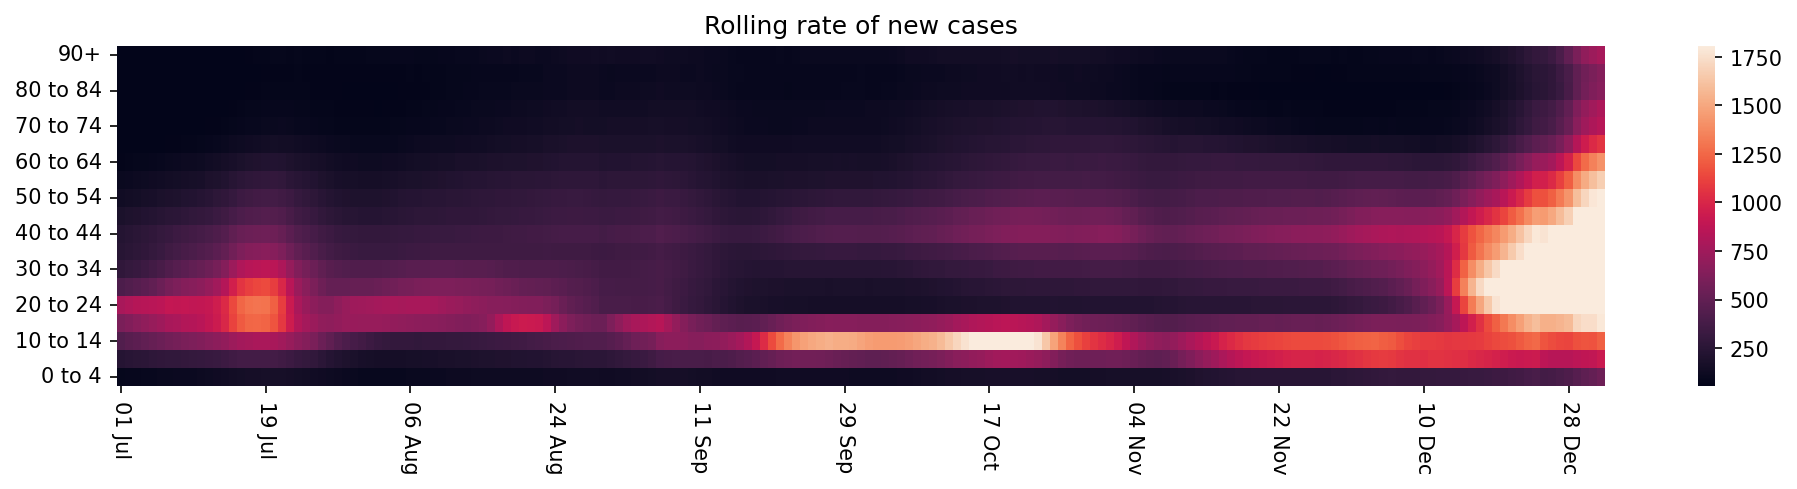

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

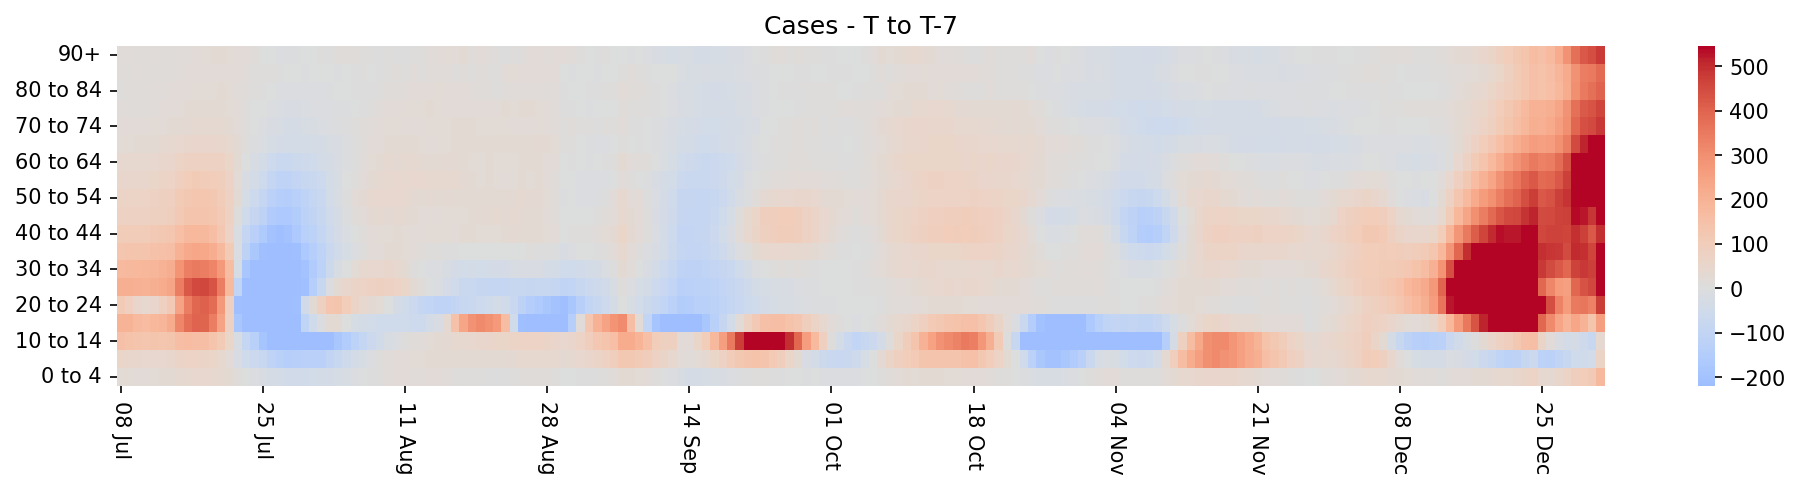

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

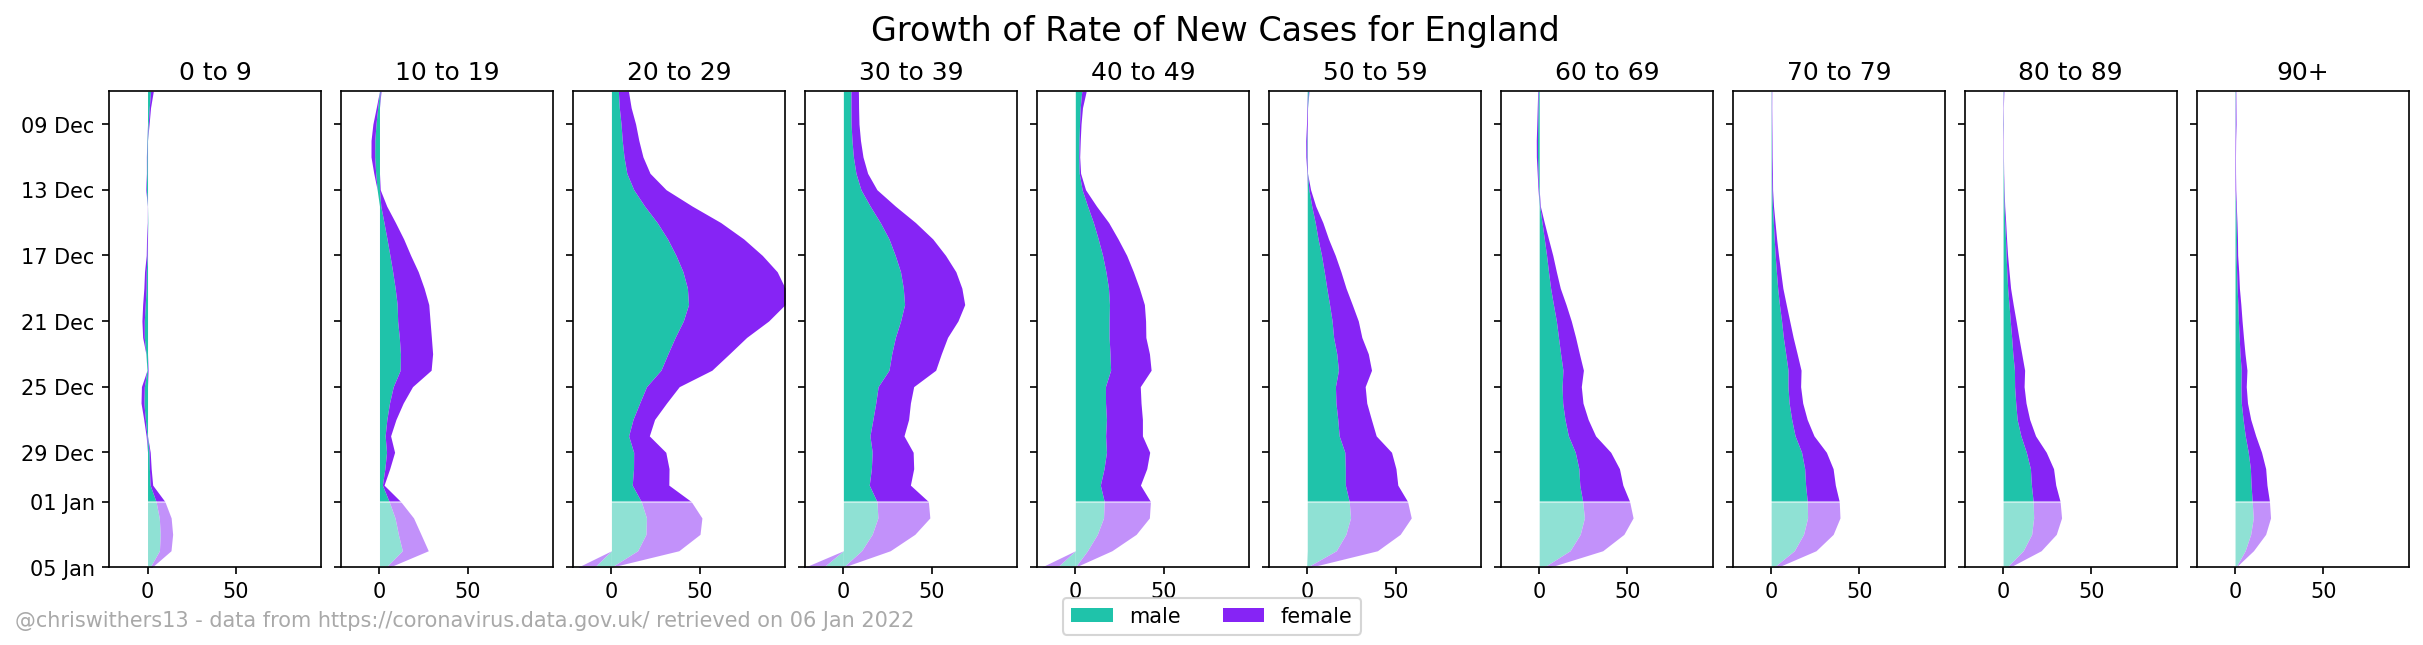

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

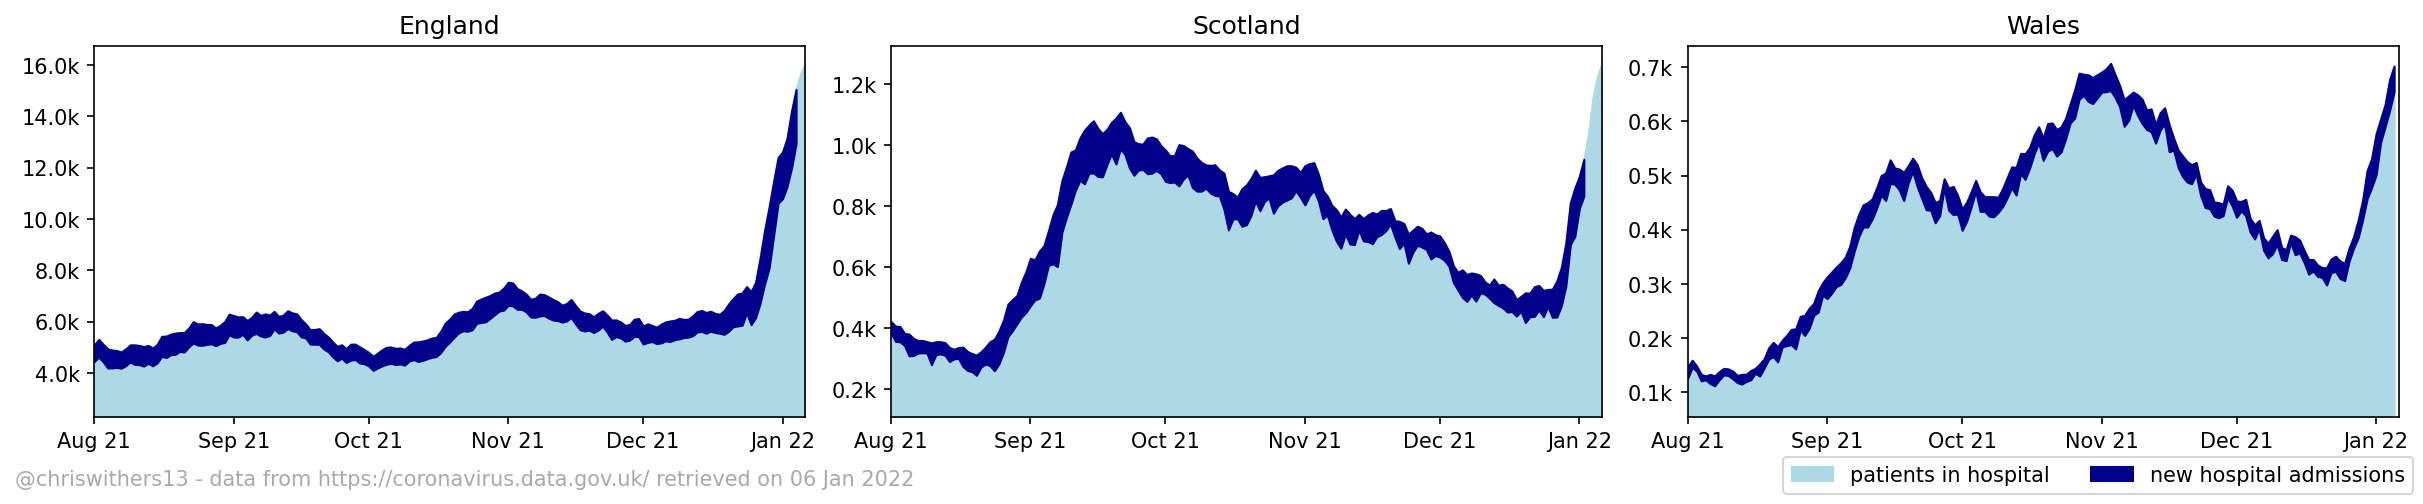

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

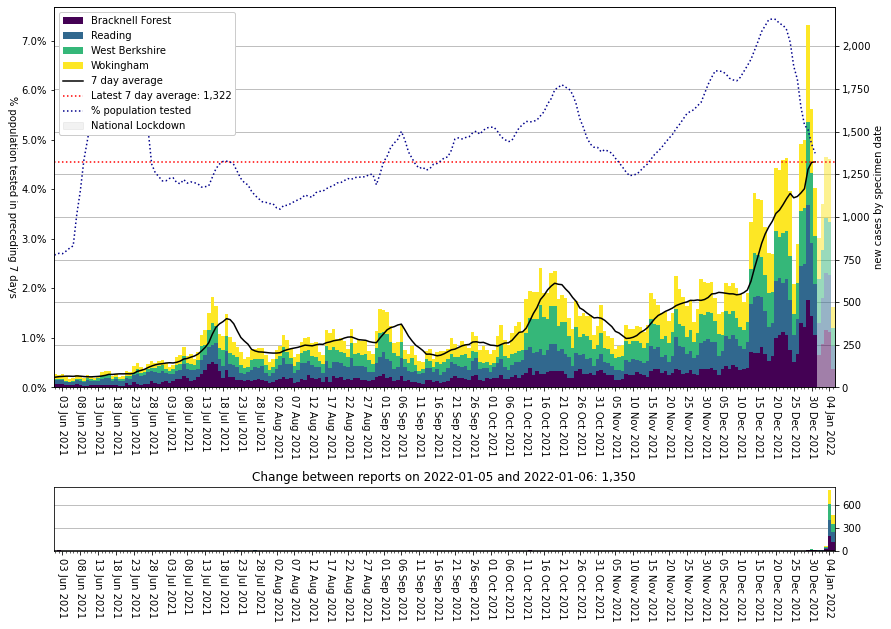

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

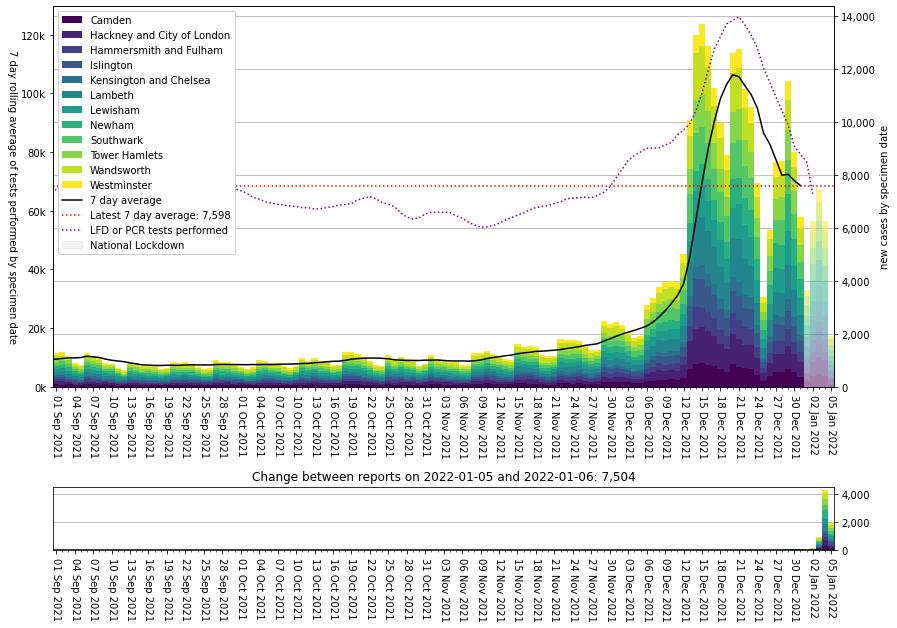

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
N09000005  Derry City and Strabane         4833.293673   
N09000006      Fermanagh and Omagh         3840.813649   
E07000029                 Copeland         3335.142191   
E07000027        Barrow-in-Furness         3202.135751   
N09000010   Newry, Mourne and Down         3127.343302   
N09000009               Mid Ulster         3089.653129   
E06000002            Middlesbrough         2806.781104   
E06000004         Stockton-on-Tees         2791.515495   
E06000003     Redcar and Cleveland         2720.379147   
E07000026                Allerdale         2689.211444   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
N09000005                  7312.0    2022-01-04  
N09000006                  4509.0    2022-01-04  
E07000029                  2274.0    2022-01-04  
E07000027                  2147.0    2022-01-04  
N09000010                  5672.0    2022-01-04  
N09000009                  4589.0    2022-01-04  
E06000002                  3957.0    2022-01-04  
E06000004                  5509.0    2022-01-04  
E06000003                  3731.0    2022-01-04  
E07000026                  2629.0    2022-01-04

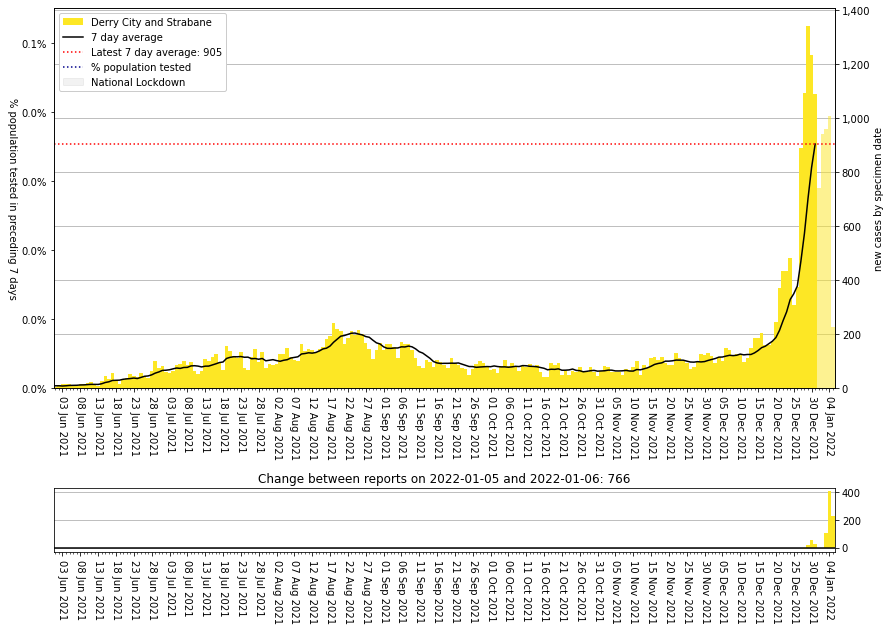

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                   
E08000025         Birmingham         1455.751189                 16622.0   
E08000035              Leeds         1779.889780                 14117.0   
S12000049       Glasgow City         1944.970938                 12314.0   
E08000012          Liverpool         2201.822336                 10966.0   
E08000019          Sheffield         1859.954553                 10878.0   
E06000047      County Durham         1954.936294                 10363.0   
E08000003         Manchester         1803.356377                  9970.0   
N09000003            Belfast         2685.261191                  9225.0   
E08000015             Wirral         2602.380783                  8432.0   
S12000036  City of Edinburgh         1599.070352                  8394.0   

          Specimen date  
areaCode                 
E08000025    2022-01-04  
E08000035    2022-01-04  
S12000049    2022-01-04  
E08000012    2022-01-04  
E08000019    2022-01-04  
E06000047    2022-01-04  
E08000003    2022-01-04  
N09000003    2022-01-04  
E08000015    2022-01-04  
S12000036    2022-01-04

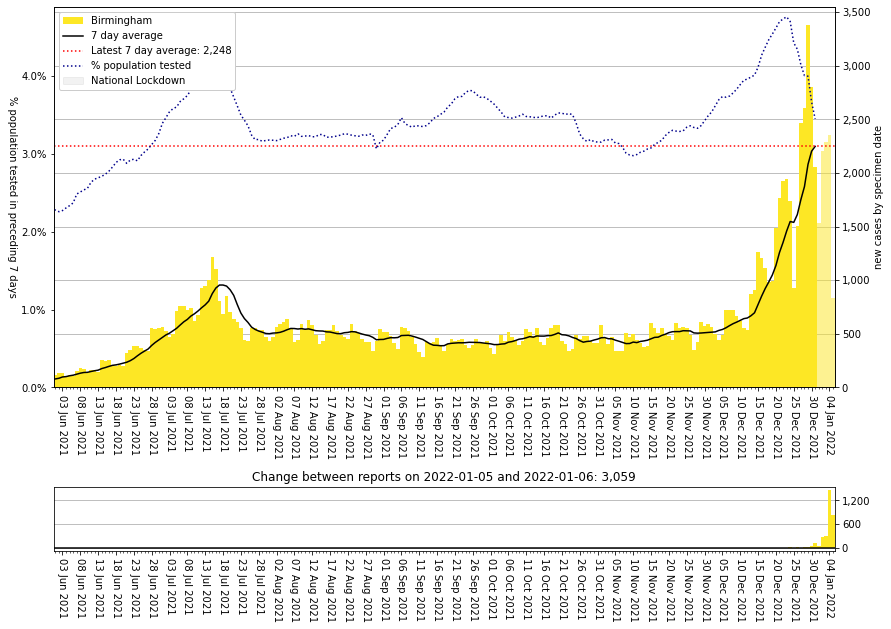

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

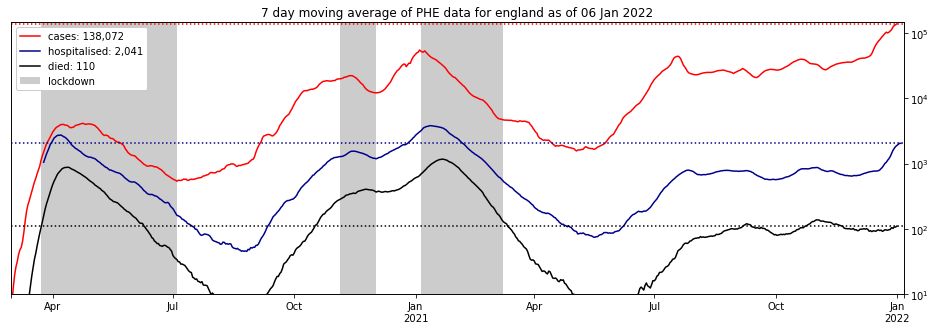

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

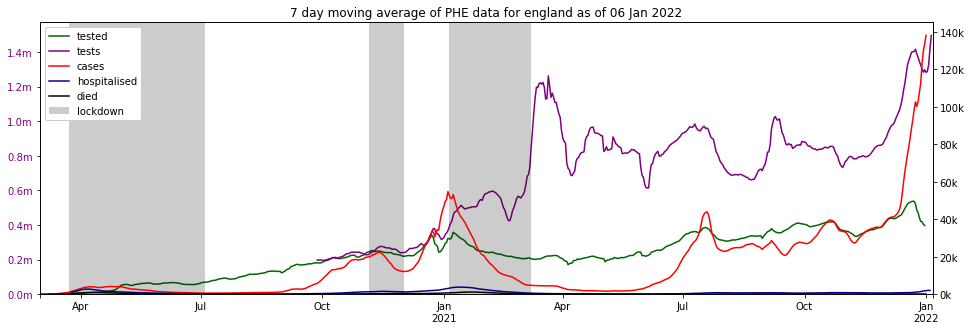

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

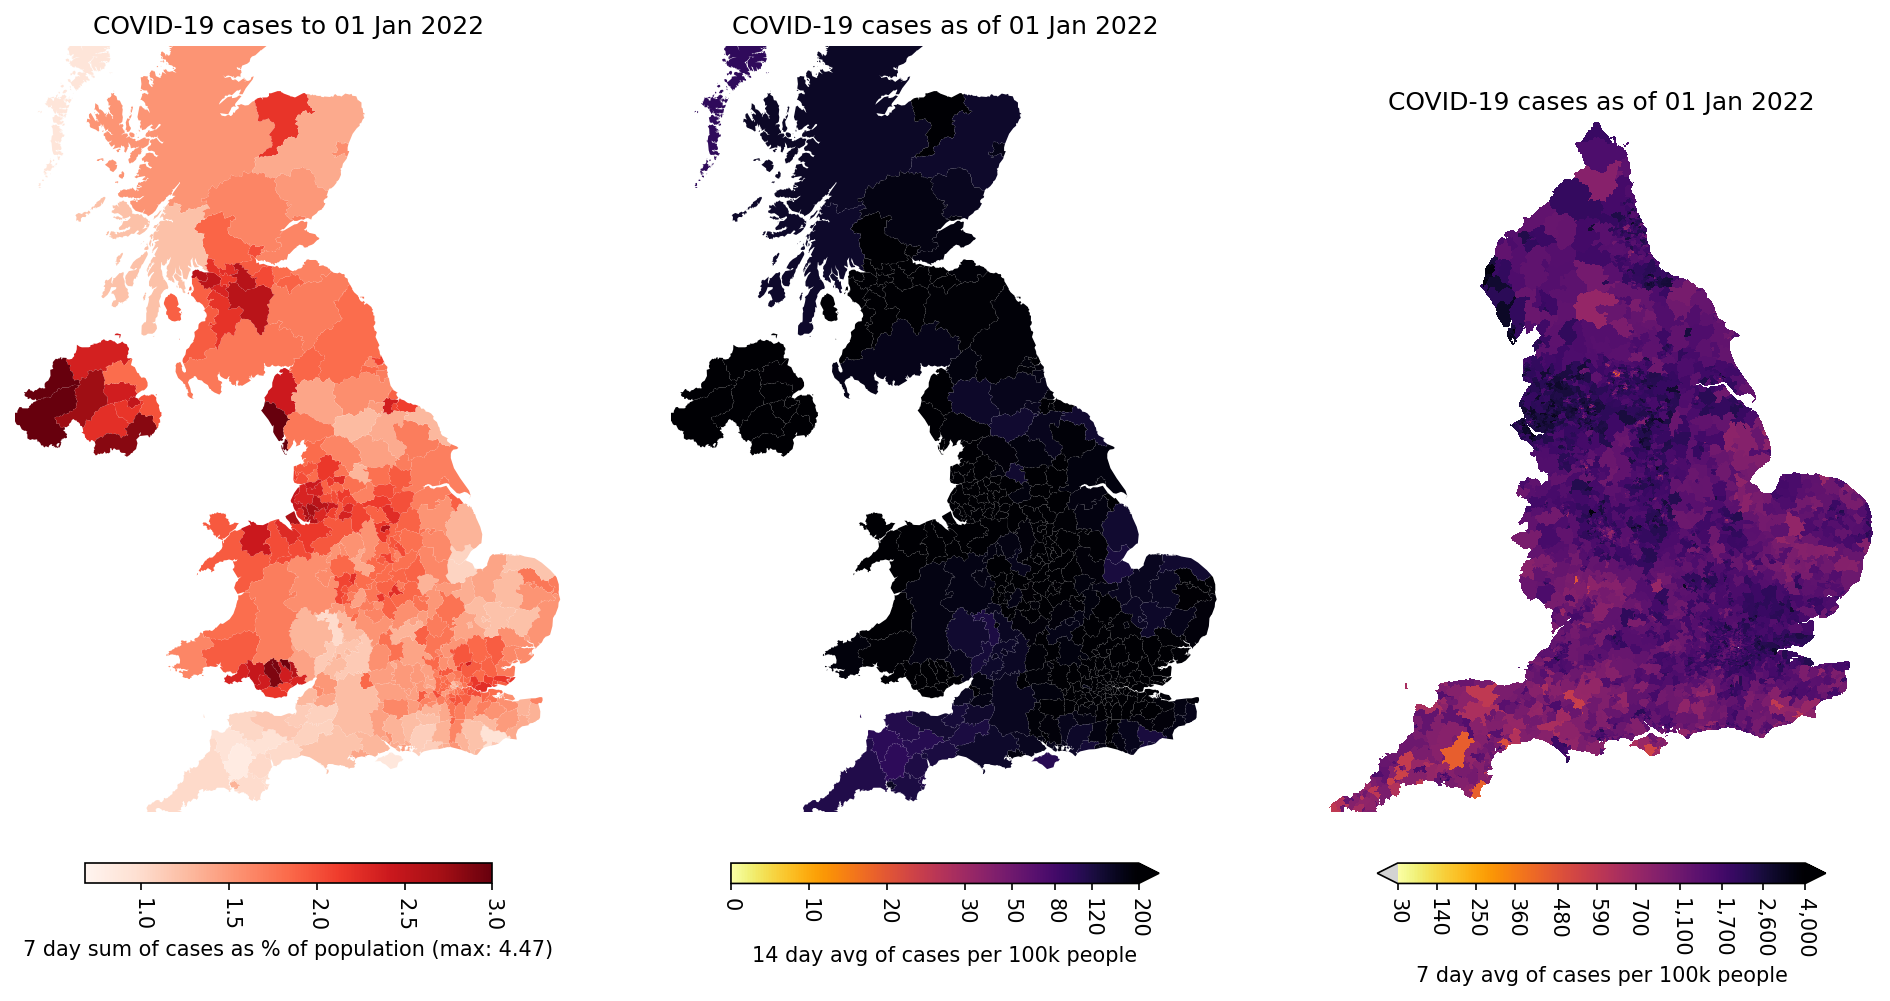

Loading BokehJS ...

In [18]:
case_maps(sum_vmax=3.0, exclude_days=4)